In [95]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from IPython.display import display
import skimage.segmentation as seg
import skimage.color as color
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.util import img_as_float

import skimage
from skimage import io
from skimage.color import rgb2gray
import skimage.segmentation as seg
from scipy import ndimage
import skimage.morphology as morph
from skimage.feature import peak_local_max
from skimage import filters
from skimage.morphology import disk, ball
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.segmentation import flood, flood_fill
from PIL import Image, ImageDraw, ImageFilter
import copy
import cv2


In [3]:
grain1_name='Ultra_Co6_2-040.jpg'
grain2_name='Ultra_Co11-2.jpg'
grain3_name='Ultra_Co25-1.jpg'

path='images'

grain1=io.imread(path+'/'+grain1_name).astype('uint8')
grain2=io.imread(path+'/'+grain2_name).astype('uint8')
grain3=io.imread(path+'/'+grain3_name).astype('uint8')

grain1_pil=Image.open(path+'/'+grain1_name)
grain2_pil=Image.open(path+'/'+grain2_name)
grain3_pil=Image.open(path+'/'+grain3_name)

In [4]:
def img_show(image,N=20,cmap=plt.cm.nipy_spectral):
    
    plt.figure(figsize=(N,N))
    plt.axis('off')
    plt.imshow(image,cmap=cmap)
    plt.show()

In [5]:
def imdivide(image,side):
    
    width,height = image.size
    sides={'left':0,'right':1}
    shape=[(0,0,width//2,height),(width//2,0,width,height)]
    return image.crop(shape[sides[side]])
 

In [6]:
def combine(image,k=0.5,N=20): 
    left_img=imdivide(image,'left')
    right_img=imdivide(image,'right')

    l=k
    r=1-l
    gray=np.array(left_img)*l
    gray+=np.array(right_img)*r
    gray=gray.astype('uint8')
    return gray

In [7]:
def do_otsu(img,N=20):
    image=rgb2gray(img)
    
    global_thresh=skimage.filters.threshold_otsu(image)
    binary_global = image > global_thresh
    
    return binary_global
    

## Выделение пустот

denoised=mean_filter(image)

binary=otsu(denoised)

grad=gradient(binary)

bin_grad=-binary+grad

In [8]:
combined1=combine(grain1_pil,0.5,10)
combined2=combine(grain2_pil,0.5,10)
combined3=combine(grain3_pil,0.5,10)

In [17]:
denoised1 = filters.rank.median(combined1, disk(3))
denoised2 = filters.rank.median(combined2, disk(3))
denoised3 = filters.rank.median(combined3, disk(3))

In [28]:
denoised3

array([[185, 185, 185, ..., 157, 151, 137],
       [181, 187, 187, ..., 160, 151, 149],
       [185, 185, 185, ..., 160, 152, 149],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

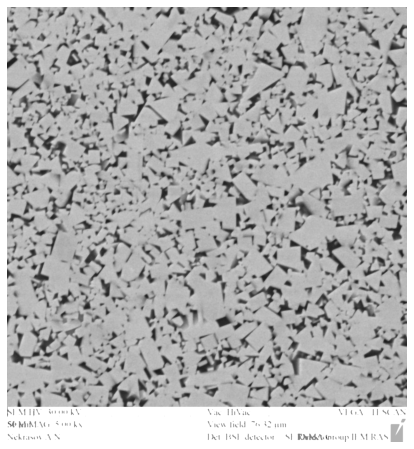

In [27]:
img_show(denoised3,N=8,cmap='gray')

In [61]:
binary1=do_otsu(denoised1).astype('uint8')
binary2=do_otsu(denoised2).astype('uint8')
binary3=do_otsu(denoised3).astype('uint8')

C:\Users\Администратор\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


In [63]:
binary3

array([[1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

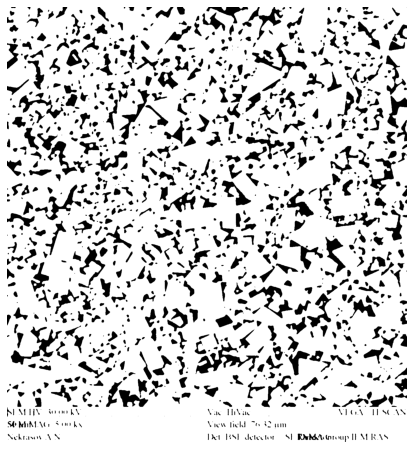

In [64]:
img_show(binary3,N=8,cmap='gray')

In [65]:
grad1 = filters.rank.gradient(binary1, disk(1))
grad2 = filters.rank.gradient(binary2, disk(1))
grad3 = filters.rank.gradient(binary3, disk(1))

In [67]:
grad3

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

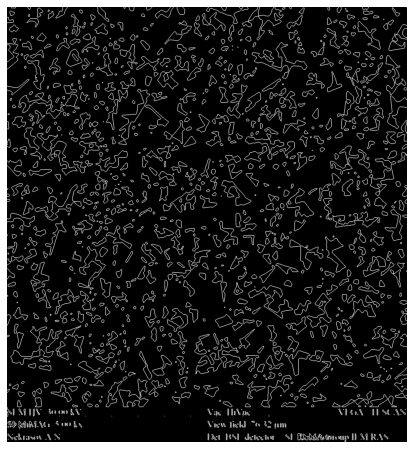

In [68]:
img_show(grad3,N=8,cmap='gray')

In [123]:
bin_grad1=1-binary1+grad1
bin_grad2=1-binary2+grad2
bin_grad3=1-binary3+grad3

In [82]:
bin_grad3

array([[0, 0, 0, ..., 0, 1, 2],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

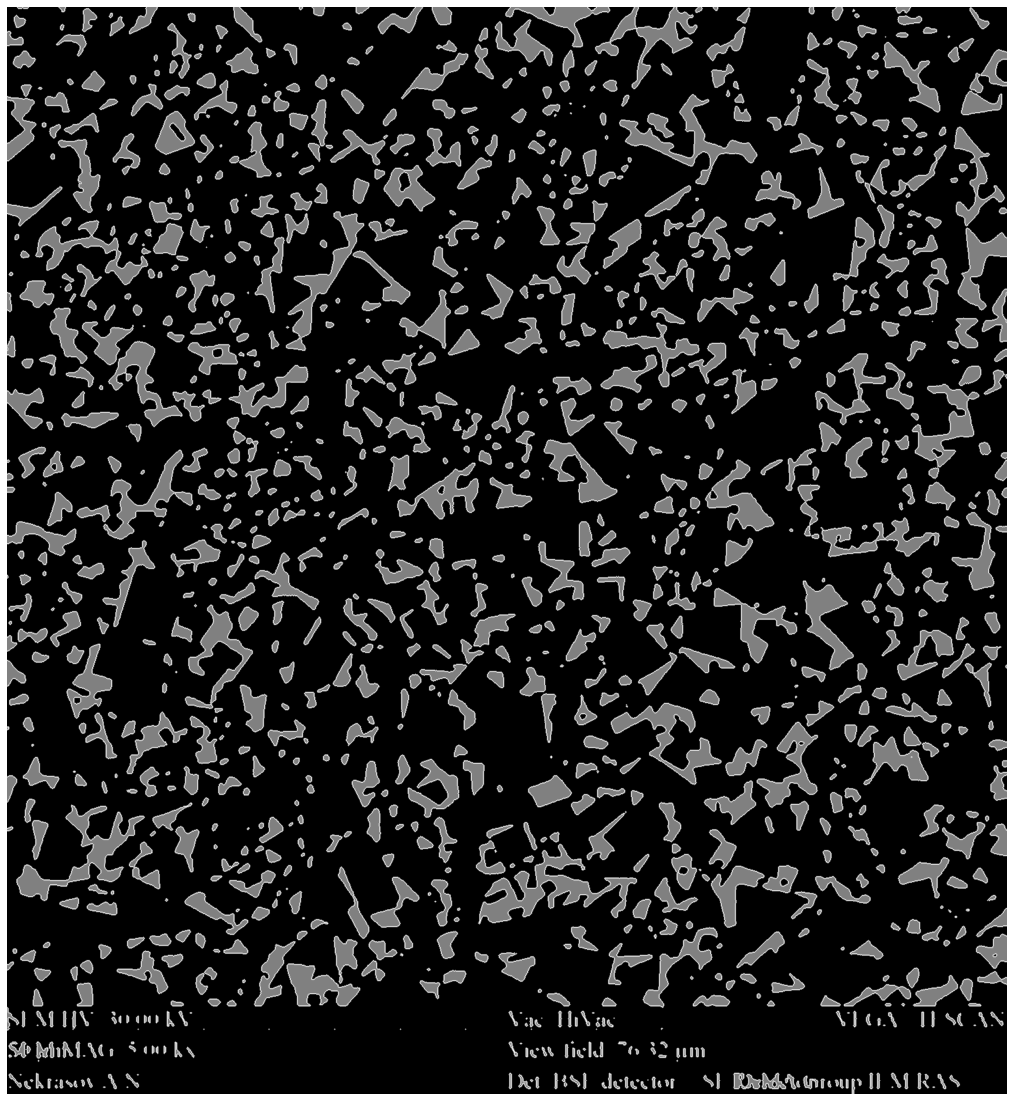

In [124]:
img_show(bin_grad3,N=20,cmap='gray')

In [184]:
def mark_corners(image):
    image=copy.copy(image)
    corners = cv2.goodFeaturesToTrack(image, 10000, 0.1, 12)

    corners = np.int0(corners)
    print('number of corners: ',len(corners))

    for i in corners:
        x, y = i.ravel()
        cv2.circle(image, (x, y), 3, 255, -1)
    return image,corners

In [153]:
io.imsave('corners.png',grain3_corners)

number of corners:  3619


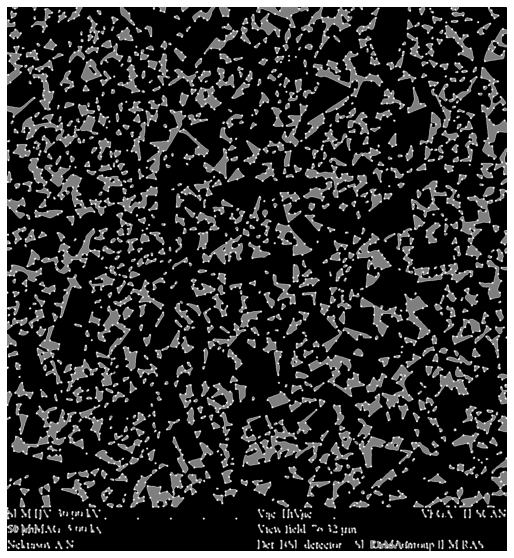

In [185]:
grain3_marked,grain3_corners=mark_corners(bin_grad3*127)
img_show(grain3_marked, N=10,cmap='gray')

markers - каждому пикселю дается свой класс, по картинке гуляет матрица свертки

number of classes: 1218


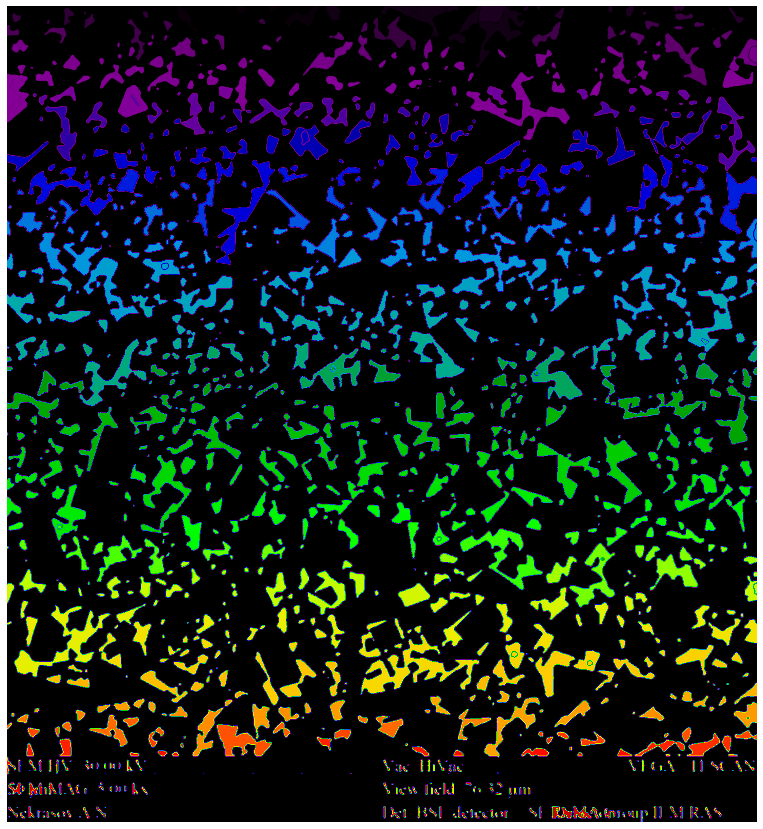

In [183]:
markers = filters.rank.gradient(bin_grad3*127, disk(1)) < 250
markers,num = ndi.label(markers)
print('number of classes:',num)
img_show(markers,N=15)

## Save

In [154]:
image=127*bin_grad3
io.imsave('bin_grad.png',image)

Будет два цикла

Первый - собирает в массив те углы, которые находятся на одном классе пикселя

Второй - будет ходить по периметру региона и будет соединять точки

In [194]:
corners.shape

(7137, 1, 2)

In [196]:
nodes.shape

(1671, 7137)

In [188]:
shape=(len(markers),len(corners))
nodes=np.zeros(shape,dtype='bool')

In [192]:
grain3_corners[0][0]

array([ 430, 1356], dtype=int64)

In [202]:
mark_len=markers.shape[0]
mark_width=markers.shape[1]
for corner in grain3_corners:
    x=corner[0][0]
    y=corner[0][1]
    if x< mark_len and y < mark_width:
        cls=markers[x,y]
        index=np.where(corners==[x,y])
        nodes[cls,index]=1

In [204]:
nodes[0]

array([ True,  True, False, ..., False, False,  True])